# Imputation

Let's create data with missing values

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        'gender': np.random.binomial(1, .6, 100),
        'height': np.random.normal(0, 10, 100), 
        'noise': np.random.normal(0, 2, 100), 
    }
)

df['height'] = df['height'] + df['gender'].apply(
    lambda g: 150 if g else 180
)
df['height (with 75% NaN)'] = df['height'].apply(
    lambda x: x if np.random.binomial(1, .25, 1)[0] else np.nan
)
df['height (with 10% NaN)'] = df['height'].apply(
    lambda x: x if np.random.binomial(1, .9, 1)[0] else np.nan
)
df['weight'] = df['height'] + df['noise'] - 110 

In [4]:
df.sample(4).reset_index()[
    [
        'height (with 75% NaN)',
        'weight'
    ]
]

,height (with 75% NaN),weight
0,NaN,38.614799
1,NaN,46.983233
2,NaN,36.125179
3,NaN,64.960558


In [5]:
df.sample(n=5)

,gender,height,noise,height (with 75% NaN),height (with 10% NaN),weight
21,1,151.423285,0.016064,NaN,151.423285,41.439349
70,0,188.913643,-2.352001,NaN,188.913643,76.561642
28,1,140.366754,1.668068,140.366754,140.366754,32.034822
4,1,152.845533,-3.242559,152.845533,152.845533,39.602974
81,1,150.726551,-1.627827,NaN,NaN,39.098724


In [6]:
df[
    [
        'gender',
        'height (with 75% NaN)',
        'weight',
    ]
].isnull().mean()

gender                   0.00
height (with 75% NaN)    0.78
weight                   0.00
dtype: float64

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


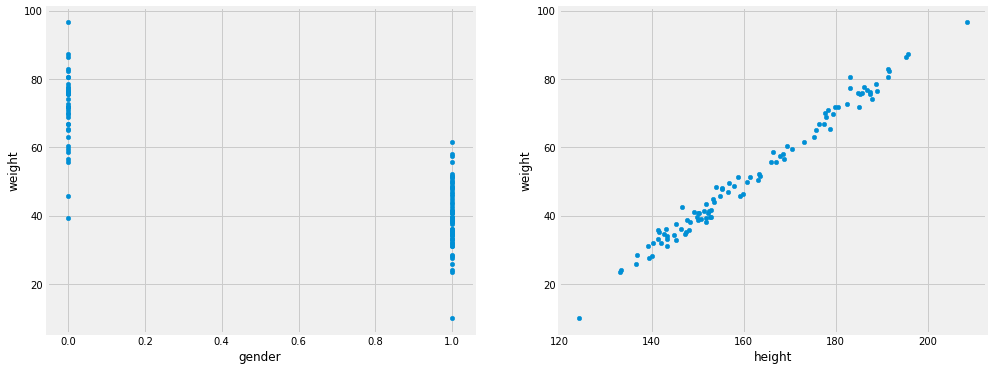

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.plot(
    kind='scatter',
    x='gender',
    y='weight',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[1]
)

fig.show()

# Simple Imputer

In [8]:
from sklearn.impute import SimpleImputer

df['height (75% zero imputed)'] = df['height (with 75% NaN)'].fillna(0)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (10% mean imputed)'] = imp.fit_transform(df[['height (with 10% NaN)']])[:, 0]
df['height (75% mean imputed)'] = imp.fit_transform(df[['height (with 75% NaN)']])[:, 0]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(df[['height (with 75% NaN)', 'gender']])[:, 0]

In [9]:
from sklearn.impute import MissingIndicator

imp = MissingIndicator(missing_values=np.nan)
df['height (is missing?)'] = imp.fit_transform(df[['height (with 75% NaN)']])[:, 0]

In [10]:
df[
    df['height (75% zero imputed)'] == 0
]['weight'].describe()

count    78.000000
mean     52.516244
std      18.652964
min       9.965745
25%      38.180359
50%      48.570769
75%      69.953581
max      96.675027
Name: weight, dtype: float64

# Comparing the effect of the Imputation strategies

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


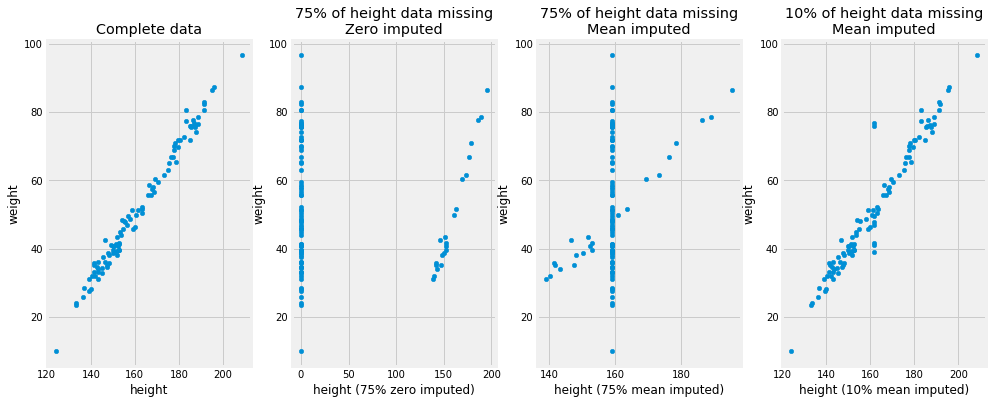

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='75% of height data missing\nZero imputed',
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight',
    ax=axs[1]
)


df.plot(
    title='75% of height data missing\nMean imputed',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[2]
)

df.plot(
    title='10% of height data missing\nMean imputed',
    kind='scatter',
    x='height (10% mean imputed)',
    y='weight',
    ax=axs[3]
)


fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


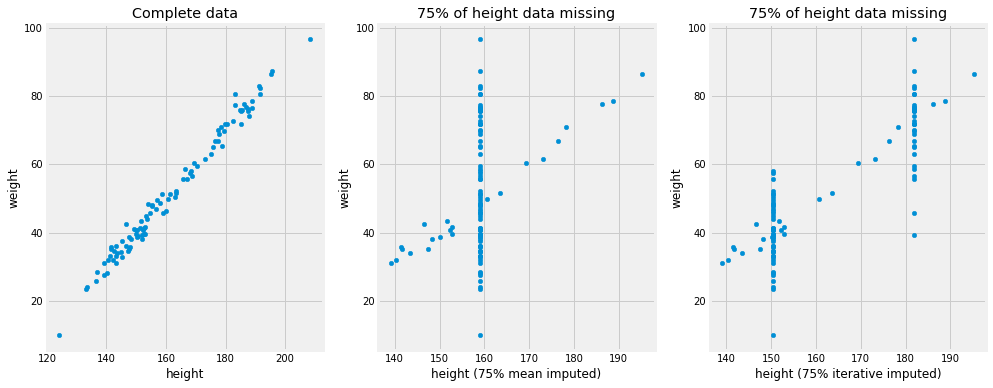

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='75% of height data missing',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[1]
)

df.plot(
    title='75% of height data missing',
    kind='scatter',
    x='height (75% iterative imputed)',
    y='weight',
    ax=axs[2]
)


fig.show()

# Imputation + Regression 

In [14]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height']], df['weight']
reg.fit(x, y)
print('Original data:', reg.coef_, reg.intercept_)
# print('Original data:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% zero imputed)']], df['weight']
reg.fit(x, y)
print('Zero imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% mean imputed)']], df['weight']
reg.fit(x, y)
print('Mean imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge(alpha=10)
# reg = DecisionTreeRegressor()
x, y = df[['gender', 'height (75% iterative imputed)',]], df['weight']
reg.fit(x, y)
print('Mean imputed data + indicator:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

Original data: [-0.04385966  0.99726604] -109.46383195458489
MSE: 4.703031303548416
Zero imputed data: [-2.20166259e+01  7.93424023e-03] 65.26258472707451
MSE: 119.38533651345102
Mean imputed data: [-19.73272337   0.53504387] -20.992158726755328
MSE: 113.07382748799405
Mean imputed data + indicator: [-0.53022893  0.96752543] -104.9616415654786
MSE: 86.40678889058803


In [15]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height']], df['weight']
reg.fit(x, y)
print('Original data:', reg.coef_, reg.intercept_)
# print('Original data:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% zero imputed)']], df['weight']
reg.fit(x, y)
print('Zero imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% mean imputed)']], df['weight']
reg.fit(x, y)
print('Mean imputed data:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

reg = Ridge()
# reg = DecisionTreeRegressor()
x, y = df[['height (75% iterative imputed)',]], df['weight']
reg.fit(x, y)
print('Mean imputed data + indicator:', reg.coef_, reg.intercept_)
# print('Mean imputed data + indicator:', reg.feature_importances_)
print('MSE:', mean_squared_error(y, reg.predict(x)))

Original data: [0.99853275] -109.69600876293777
MSE: 4.703320514177929
Zero imputed data: [-0.0038457] 52.024554187577756
MSE: 329.9232879169621
Mean imputed data: [0.98099073] -104.1690320693751
MSE: 270.36113636930327
Mean imputed data + indicator: [0.98352832] -107.89014959803853
MSE: 86.46447393318422


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


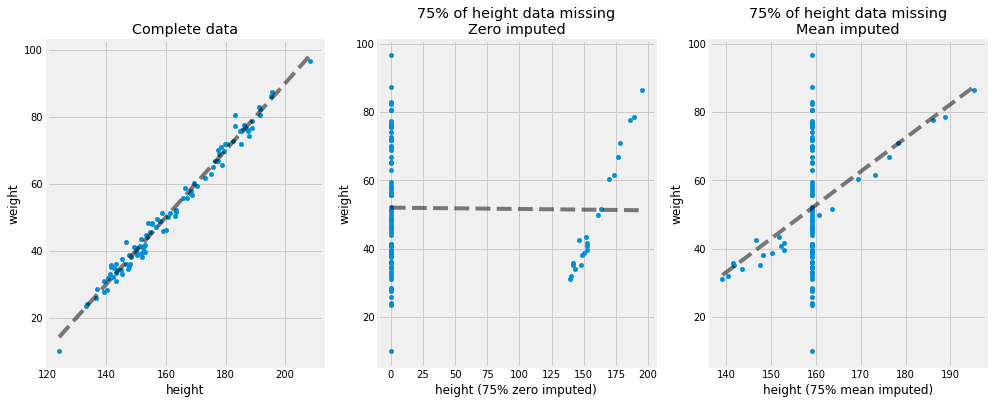

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

x, y = df[['height']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[0].plot(
    [
        df['height'].min(),
        df['height'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height'].min(),
        reg.intercept_ + reg.coef_[0] * df['height'].max()
    ], 
    'k--',
    alpha=0.5,
)

df.plot(
    title='75% of height data missing\nZero imputed',
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight',
    ax=axs[1]
)
x, y = df[['height (75% zero imputed)']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[1].plot(
    [
        df['height (75% zero imputed)'].min(),
        df['height (75% zero imputed)'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height (75% zero imputed)'].min(),
        reg.intercept_ + reg.coef_[0] * df['height (75% zero imputed)'].max()
    ], 
    'k--',
    alpha=0.5,
)


df.plot(
    title='75% of height data missing\nMean imputed',
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight',
    ax=axs[2]
)
x, y = df[['height (75% mean imputed)']], df['weight']
reg = Ridge()
reg.fit(x, y)
axs[2].plot(
    [
        df['height (75% mean imputed)'].min(),
        df['height (75% mean imputed)'].max()
    ], 
    [
        reg.intercept_ + reg.coef_[0] * df['height (75% mean imputed)'].min(),
        reg.intercept_ + reg.coef_[0] * df['height (75% mean imputed)'].max()
    ], 
    'k--',
    alpha=0.5,
)


fig.show()